In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import seaborn as sn
import random

In [2]:
!pip install keras

In [3]:
!pip install tensorflow

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix as cm
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import svm
#evaluation of model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Standard Libraries
import re
import string

# NLTK Libraries
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# HTML Parsing
from bs4 import BeautifulSoup

# Download required NLTK datasets
nltk.download('punkt')        # Tokenization
nltk.download('stopwords')    # Stop words list
nltk.download('wordnet')      # Lemmatizer
nltk.download('omw-1.4')      # Lemmatizer language data (optional but useful)

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADI\AppData\Roaming\nltk_data...
[nltk_data] Error downloading 'omw-1.4' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-
[nltk_data]     pages/packages/corpora/omw-1.4.zip>:   <urlopen error
[nltk_data]     [SSL: TLSV1_ALERT_DECODE_ERROR] tlsv1 alert decode
[nltk_data]     error (_ssl.c:1000)>


In [10]:
#all packages 
import nltk 
import string 
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from bs4 import BeautifulSoup
nltk.download('stopwords')
import string #has the list of all punctuations
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
df = pd.read_csv("E:/nikki ai/mental-health-chatbot-main/model/20200325_counsel_chat.csv",encoding="utf-8")

In [12]:
len(df['topic'].unique())

31

In [13]:
df.columns

Index(['Unnamed: 0', 'questionID', 'questionTitle', 'questionText',
       'questionLink', 'topic', 'therapistInfo', 'therapistURL', 'answerText',
       'upvotes', 'views', 'split'],
      dtype='object')

In [14]:
len(df)

2129

In [15]:
for index,rows in df.iterrows():
    print(df['questionText'][index])

I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.
   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.
   How can I change my feeling of being worthless to everyone?
I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.
   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.
   How can I change my feeling of being worthless to everyone?
I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.
   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.
   How can I change my feeling of being worthless to everyone?
I'm going thr

In [16]:
len(df['questionTitle'].unique())

818

Axes(0.125,0.11;0.775x0.77)


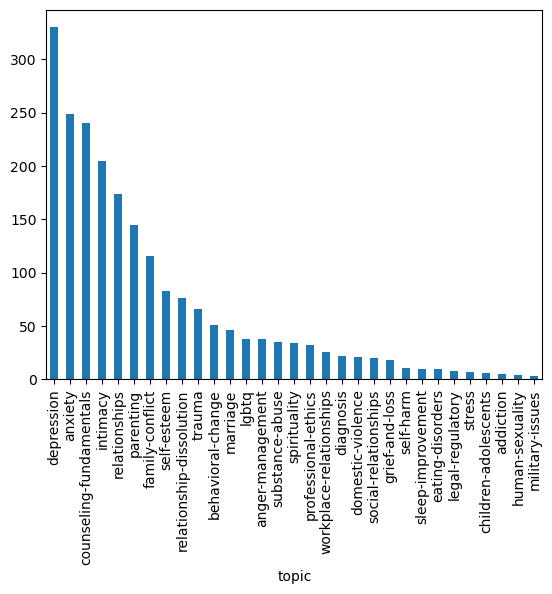

In [17]:
x = df['topic'].value_counts()
print(x.plot.bar())

In [18]:
topics = df['topic'].unique()

In [19]:
#for now predict the topic

In [20]:
stop_w = stopwords.words('english')

In [21]:
def clean(column,df,stopwords=False):
  #remove stop words
  df[column] = df[column].apply(str)
  df[column] = df[column].str.lower().str.split()
  if stopwords:
        df[column]=df[column].apply(lambda x: [item for item in x if item not in stop_w])
  #remove punctuation
  df[column]=df[column].apply(lambda x: [item for item in x if item not in string.punctuation])
  df[column]=df[column].apply(lambda x: " ".join(x))
  
  #lowercase text - already done in models

In [ ]:
df.dtypes

Unnamed: 0        int64
questionID        int64
questionTitle    object
questionText     object
questionLink     object
topic            object
therapistInfo    object
therapistURL     object
answerText       object
upvotes           int64
views             int64
split            object
dtype: object

In [23]:
clean('questionTitle',df)

In [22]:
df['questionTitle'][155]

"I've been feeling sadness"

In [24]:
clean('questionText',df)

In [25]:
X = df['questionTitle']+df['questionText']
y = df['topic']

In [26]:
y

0                    depression
1                    depression
2                    depression
3                    depression
4                    depression
                 ...           
2124    counseling-fundamentals
2125    counseling-fundamentals
2126    counseling-fundamentals
2127    counseling-fundamentals
2128    counseling-fundamentals
Name: topic, Length: 2129, dtype: object

In [28]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [29]:
le.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [30]:
#word embeddings
import tensorflow as tf
!pip install tensorflow_hub
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [33]:
import joblib
joblib.dump(y,'labelencoder.joblib')

['labelencoder.joblib']

In [34]:
joblib.dump(le,'newle.joblib')

['newle.joblib']

In [35]:
X[0]

"can i change my feeling of being worthless to everyone?i'm going through some things with my feelings and myself. i barely sleep and i do nothing but think about how i'm worthless and how i shouldn't be here. i've never tried or contemplated suicide. i've always wanted to fix my issues, but i never get around to it. how can i change my feeling of being worthless to everyone?"

In [36]:
X

0       can i change my feeling of being worthless to ...
1       can i change my feeling of being worthless to ...
2       can i change my feeling of being worthless to ...
3       can i change my feeling of being worthless to ...
4       can i change my feeling of being worthless to ...
                              ...                        
2124    what happens in a counseling session?after fir...
2125    what happens in a counseling session?after fir...
2126    what happens in a counseling session?after fir...
2127    what happens in a counseling session?after fir...
2128    what happens in a counseling session?after fir...
Length: 2129, dtype: object

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [38]:
y_train[0]

18

In [39]:
y_train

array([18,  8, 15, ..., 13,  6,  1], dtype=int64)

In [40]:
len(le.classes_)

31

In [41]:
logreg = Pipeline([('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
            ('clf', LogisticRegression(penalty='l2')),
            ])
ans = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Test accuracy is :'+ str(accuracy_score(y_test, y_pred)))

Test accuracy is :0.6971830985915493


<Axes: xlabel='Predicted', ylabel='Actual'>

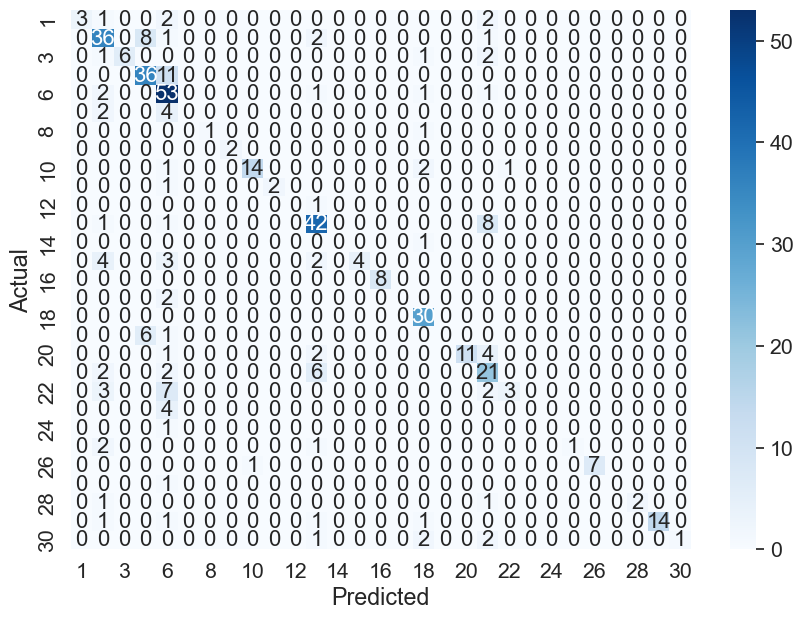

In [42]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(le.inverse_transform(y_test)), index = np.unique(le.inverse_transform(y_test)))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [44]:
NB_WORDS = 5000

NB_EPOCHS = 15  

BATCH_SIZE = 32 

MAX_LEN = 200

In [45]:
X_train

613     if my kids come back from their dad's and act ...
1009    how do i get my partner to stop verbally abusi...
1710    how can i deal with gender dysphoria in a posi...
1554    how do i fix my relationship?my boyfriend is i...
133     is wishing i wasn't born a sign of something d...
                              ...                        
960     could a car accident add more problems to my p...
905     how do i get over a coworker?i've worked with ...
1096    should i get a divorce?i have cheated on my hu...
235     my husband wants a divorce after i was diagnos...
1061    how do i manage my anger?i am so angry. i feel...
Length: 1703, dtype: object

In [56]:
tokenizer = Tokenizer(
    num_words = NB_WORDS,
    filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~'
)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen = MAX_LEN)
y_train = to_categorical(y_train) #one hot encoding for keras

<>:3: SyntaxWarning: invalid escape sequence '\]'
<>:3: SyntaxWarning: invalid escape sequence '\]'
C:\Users\ADI\AppData\Local\Temp\ipykernel_24152\1541284278.py:3: SyntaxWarning: invalid escape sequence '\]'
  filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~'


In [57]:
import joblib
joblib.dump(tokenizer,'tokenizer.joblib')

['tokenizer.joblib']

In [61]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D

model = Sequential()
model.add(Embedding(NB_WORDS,output_dim=256,input_length = MAX_LEN))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(256, dropout= 0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(31,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

e:\anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [62]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [63]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.1,
    epochs =NB_EPOCHS,
    callbacks=[callback],
    batch_size = BATCH_SIZE
)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0000e+00 - loss: 3.4254 - val_accuracy: 0.0000e+00 - val_loss: 3.4461
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 1.0000 - loss: 3.3777 - val_accuracy: 0.0000e+00 - val_loss: 3.4376
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 1.0000 - loss: 3.2345 - val_accuracy: 0.0000e+00 - val_loss: 3.4415
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 1.0000 - loss: 3.1376 - val_accuracy: 0.0000e+00 - val_loss: 3.4557
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 1.0000 - loss: 2.9185 - val_accuracy: 0.0000e+00 - val_loss: 3.5121
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 1.0000 - loss: 2.2640 - val_accuracy: 0.0000e+00 - val_loss: 3.9487
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 1.0000 - loss: 0.6382 - val_accuracy: 0.0000e+00 - val_loss: 5.0142
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 1.0000 - loss: 0.3254 - val

In [64]:
data = ["I have been feeling really down. I do not feel like eating and I feel miserable.",
         "I've been really stressed out. I just broke up with my boyfriend. Our relationship had problems",
        "My boss has been troubling me. I am sick of it.",
       "He keeps hitting me at home. He is abusive and throws things and yells at me. Husband is drunk all the time."]
x_try = pd.DataFrame(data,columns=['text'])

In [65]:
clean('text',x_try)

In [66]:
x_try

,text
0,i have been feeling really down. i do not feel...
1,i've been really stressed out. i just broke up...
2,my boss has been troubling me. i am sick of it.
3,he keeps hitting me at home. he is abusive and...


In [67]:
x_try = x_try['text']

In [ ]:
x_try = x_try.at[0,'text']

In [78]:
x_try

0    i have been feeling really down. i do not feel...
1    i've been really stressed out. i just broke up...
2      my boss has been troubling me. i am sick of it.
3    he keeps hitting me at home. he is abusive and...
Name: text, dtype: object

In [79]:
x_try = tokenizer.texts_to_sequences(x_try)
x_try = pad_sequences(x_try, maxlen = MAX_LEN)

In [80]:
ans = model.predict(x_try)
result = []
for val in ans:
    res = val.argmax()
    result.append(res)
    #print(le.inverse_transform(res))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


In [82]:
print(le.inverse_transform(result))

[18 18 18 18]


In [83]:
model.save('chatbot.h5')

In [84]:
dict = {}

In [85]:
for index,row in df.iterrows():
    t = row['topic']
    if t in dict.keys():
        dict[t].append(row['answerText'])
    else:
        dict[t] = [row['answerText']]

In [86]:
random.choice(dict['depression'])

'Is it possible that even though your illness is chronic, that it goes through phases in which you are more comfortable and that it requires less focus from you than at other times?I think the idea of having a lifelong illness is frustrating and can be depressing to think about. \xa0Thoughts are not necessarily the truth of what will actually happen though.Illness makes negative situations look worse so be sure you are concentrating on specific areas of your life and not just assuming they will work out badly because you are ill.One way to be happy alone is to love and appreciate, nurture and be kind to yourself.This frame of mind may generate new answers to find ways of being among other people too.'

In [87]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=5, n_jobs=-1)

In [92]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(n_neighbors=5)
model_knn.fit(X_train)

NearestNeighbors()

In [93]:
import pickle
a_file = open("topic_answers.pkl", "wb")
pickle.dump(dict, a_file)
#a_file.close()

In [94]:
a_file

<_io.BufferedWriter name='topic_answers.pkl'>

In [95]:
objects = []
with (open("topic_answers.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

QNA MODEL USING SIMILARITY METRICS

In [96]:
len(df['questionText'].unique())

824

In [97]:
df2 = df

In [98]:
clean('questionText',df2) #kept stopwords

In [99]:
df2['questionText']

0       i'm going through some things with my feelings...
1       i'm going through some things with my feelings...
2       i'm going through some things with my feelings...
3       i'm going through some things with my feelings...
4       i'm going through some things with my feelings...
                              ...                        
2124    after first meeting the client, what is the pr...
2125    after first meeting the client, what is the pr...
2126    after first meeting the client, what is the pr...
2127    after first meeting the client, what is the pr...
2128    after first meeting the client, what is the pr...
Name: questionText, Length: 2129, dtype: object

In [103]:
!pip install bert_serving.client
!pip install -U scikit-learn
from bert_serving.client import BertClient
from sklearn.metrics.pairwise import cosine_similarity

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.1 MB 3.2 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.1 MB 3.2 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/11.1 MB 3.0 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.1 MB 3.1 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/11.1 MB 2.7 MB/s eta 0:00:03
   ------------- -------------------------- 3.7/11.1 MB 2.8 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.1 MB 2.7 MB/s eta 0:00:03
   ----------------- ---------------------- 5.0/11.1 MB 2.7 MB/s eta 0:00:03
   ------------------- -------------------- 5.5/11.1 MB 2.7 MB/s eta 0:00:03
   -----------------

  You can safely remove it manually.


In [109]:
from sklearn.metrics.pairwise import cosine_similarity

def retrieveAndPrintFAQAnswer(question, question_embedding, sentence_embeddings, FAQdf, sentences):
    max_sim = -1
    index_sim = -1

    for index, faq_embedding in enumerate(sentence_embeddings):
        # Ensure the embeddings are 2D
        sim = cosine_similarity(faq_embedding.reshape(1, -1), question_embedding.reshape(1, -1))[0][0]
        print(index, f"Similarity: {sim:.4f}", "| Sentence:", sentences[index])
        if sim > max_sim:
            max_sim = sim
            index_sim = index

    print("\n")
    print("Question: ",question)
    print("\n");
    print("Retrieved: ",FAQdf.iloc[index_sim,0]) 
    print(FAQdf.iloc[index_sim,1])   

    return FAQdf.iloc[index_sim, 1]  # Return the best matched answer


In [ ]:
#BERT
!pip install bert_serving.client
from bert_serving.client import BertClient
bc = BertClient()